In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 22,15
rcParams['xtick.labelsize'] = 124
rcParams['ytick.labelsize'] = 124
import numpy as np
import os 
my_path = os.path.abspath('/Users/juan/Desktop/Git/3level/DATA/PAPER_DATA')
my_path1 = os.path.abspath('/Users/juan/Desktop/3level_img/')



In [3]:
class variables():
    def __init__(self):
         #eigen energies
        self.w10 = 20
        self.w2w1 = 1.6
        self.w20 = self.w10*self.w2w1
        #driving frequency
        self.omega = np.arange(0,100,.25)
        #carnot efficiency
        self.n_c  =np.arange(1e-6,1,0.02)
        #temperatures
        self.b_l  = 1/np.array([250,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
       #energy variables
        self.l = np.linspace(0,np.sqrt(self.w20*self.w10),20)
        self.e_20 = ((self.w20+self.w10)/2 + np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2  ))
        self.e_10 = ((self.w20+self.w10)/2 - np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2  ))
       #lindblad constants
        self.g_l10  = .10
        self.g_h10 =  self.g_l10
        self.g_h20  = self.g_l10*5
        self.g_l20 = self.g_h20
       
        #cosine data
        self.c    = (self.w20 -self.w10 )/(2*np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2))
        #power variables
    def g1(self):
        return 1/2*(self.g_l10*(1+self.c) + self.g_h10*(1-self.c))
    def g2(self):
        return 1/2*(self.g_l20*(1-self.c) + self.g_h20*(1+self.c)) 
    def g1m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l10*(1+self.c)*np.exp(-self.b_l*self.e_10)\
                        + self.g_h10*(1-self.c)*np.exp(-self.b_h[value]*self.e_10)))
        return result
    def g2m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l20*(1-self.c)*np.exp(-self.b_l*self.e_20) \
                        + self.g_h20*(1+self.c)*np.exp(-self.b_h[value]*self.e_20)))
        return result

    def omega(self):
        return ((self.e_20-self.e_10)**2 + ( (self.g1()+self.g2())/2)**2)\
                /(self.w20)

    def G(self):
        result =[]
        for value in range(len(self.l)):
            result.append(1/2*(self.g1()[value]+self.g2()[value])+ \
                          ( (self.e_20[value]-self.e_10[value] -self.omega*self.c[value])**2)\
                /(1/2*(self.g1()[value]+self.g2()[value])))
        return result 
    
    def q1(self):
        return (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    
    def q2(self):
        return (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
         
 #Initialize the object var       

var = variables()



In [4]:
def POWER(var,T):
    temp  = T
    omega = var.omega
    l     = var.l
    e21   = var.e_20- var.e_10
    g2m   = var.g2m()[T]
    g2    = var.g2()
    g1m   = var.g1m()[T]
    g1    = var.g1()
    #omega dependent variables
    G     = var.G()
    result =[]
    
    for value in range(len(l)):
        result.append( (((2*(l[value]*omega)**2)/e21[value])\
                        *(g2m[value]/g2[value] - g1m[value]/g1[value]))\
                      /( (1/2 + g1m[value]/g1[value])*(((4*(l[value]*omega)**2)/( (e21[value]**2)*g2[value]))+G[value])\
                       + (1/2 + g2m[value]/g2[value])*(((4*(l[value]*omega)**2)/( (e21[value]**2)*g1[value]))+G[value])))
    return result 




Text(0.5, 1.0, '$\\frac{\\gamma_h(\\epsilon_{10})}{\\gamma_h(\\epsilon_{20})},\\frac{\\gamma_l(\\epsilon_{20})}{\\gamma_l(\\epsilon_{10})}=0.000$$ \\;\\;\\; \\eta_c=0.78$')

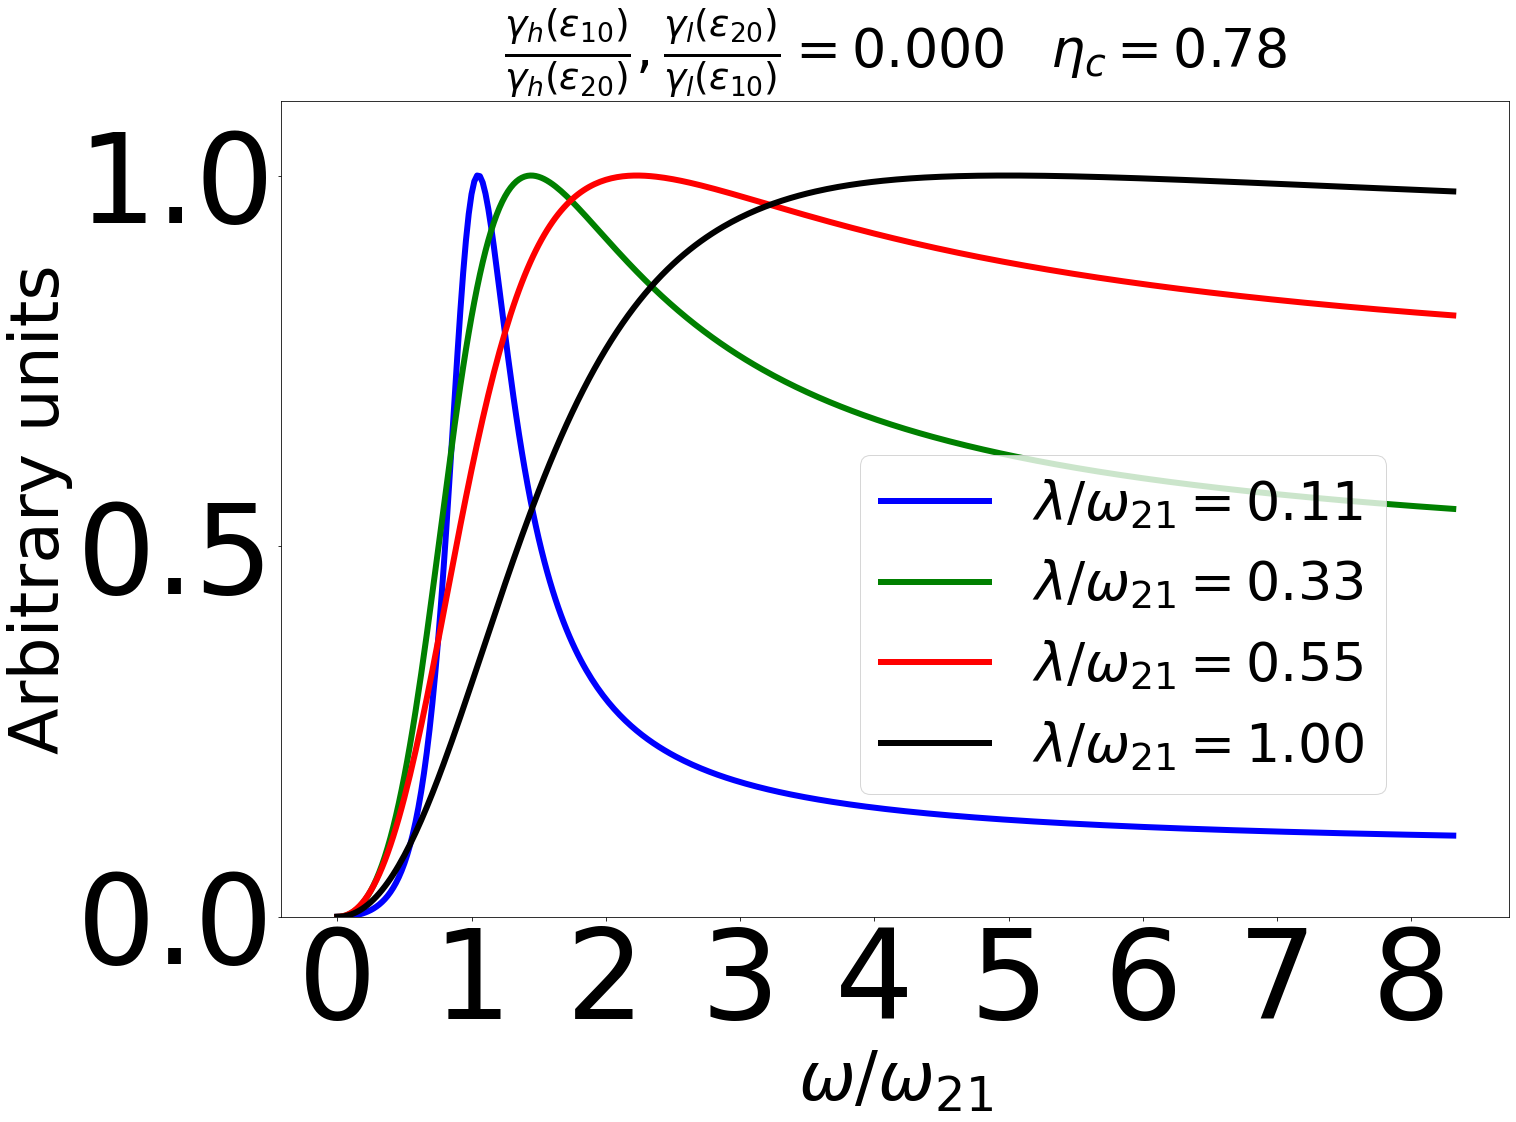

In [5]:
var.g_h10 =  var.g_l10*0
var.g_l20 = var.g_h20*0
P = POWER(var,39)
color = ['blue', 'green', 'red','black']
values =[1,3,5,9]
x =var.omega/(var.w20-var.w10)
for i in range(4):
    plt.plot( x ,P[values[i]]/max(P[values[i]]), lw=6,\
             c= color[i],label= r'$ \lambda/\omega_{21}=%.2f$'%(var.l[values[i]]/(var.w20-var.w10))  )
    plt.ylim(0,1.1)
    plt.legend(bbox_to_anchor=(.9, .15), loc='lower right', borderaxespad=0, fontsize=54)
    plt.xlabel(r'$\omega/\omega_{21}}$',fontsize=68)
    plt.xticks(np.arange(9))
    plt.ylabel('Arbitrary units',fontsize=68)
plt.title(r'$\frac{\gamma_h(\epsilon_{10})}{\gamma_h(\epsilon_{20})},\frac{\gamma_l(\epsilon_{20})}{\gamma_l(\epsilon_{10})}=%.3f$'\
             %(var.g_h10/var.g_l10)\
               + r'$ \;\;\; \eta_c=%.2f$'%(1-var.b_h[39]/var.b_l), fontsize= 54)  
#plt.savefig(os.path.join(my_path1,'3level_omega_uniform.eps'))


<ipython-input-10-4f45cf1940c4>:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout( rect=[0, 0, 4.6, 2.6])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


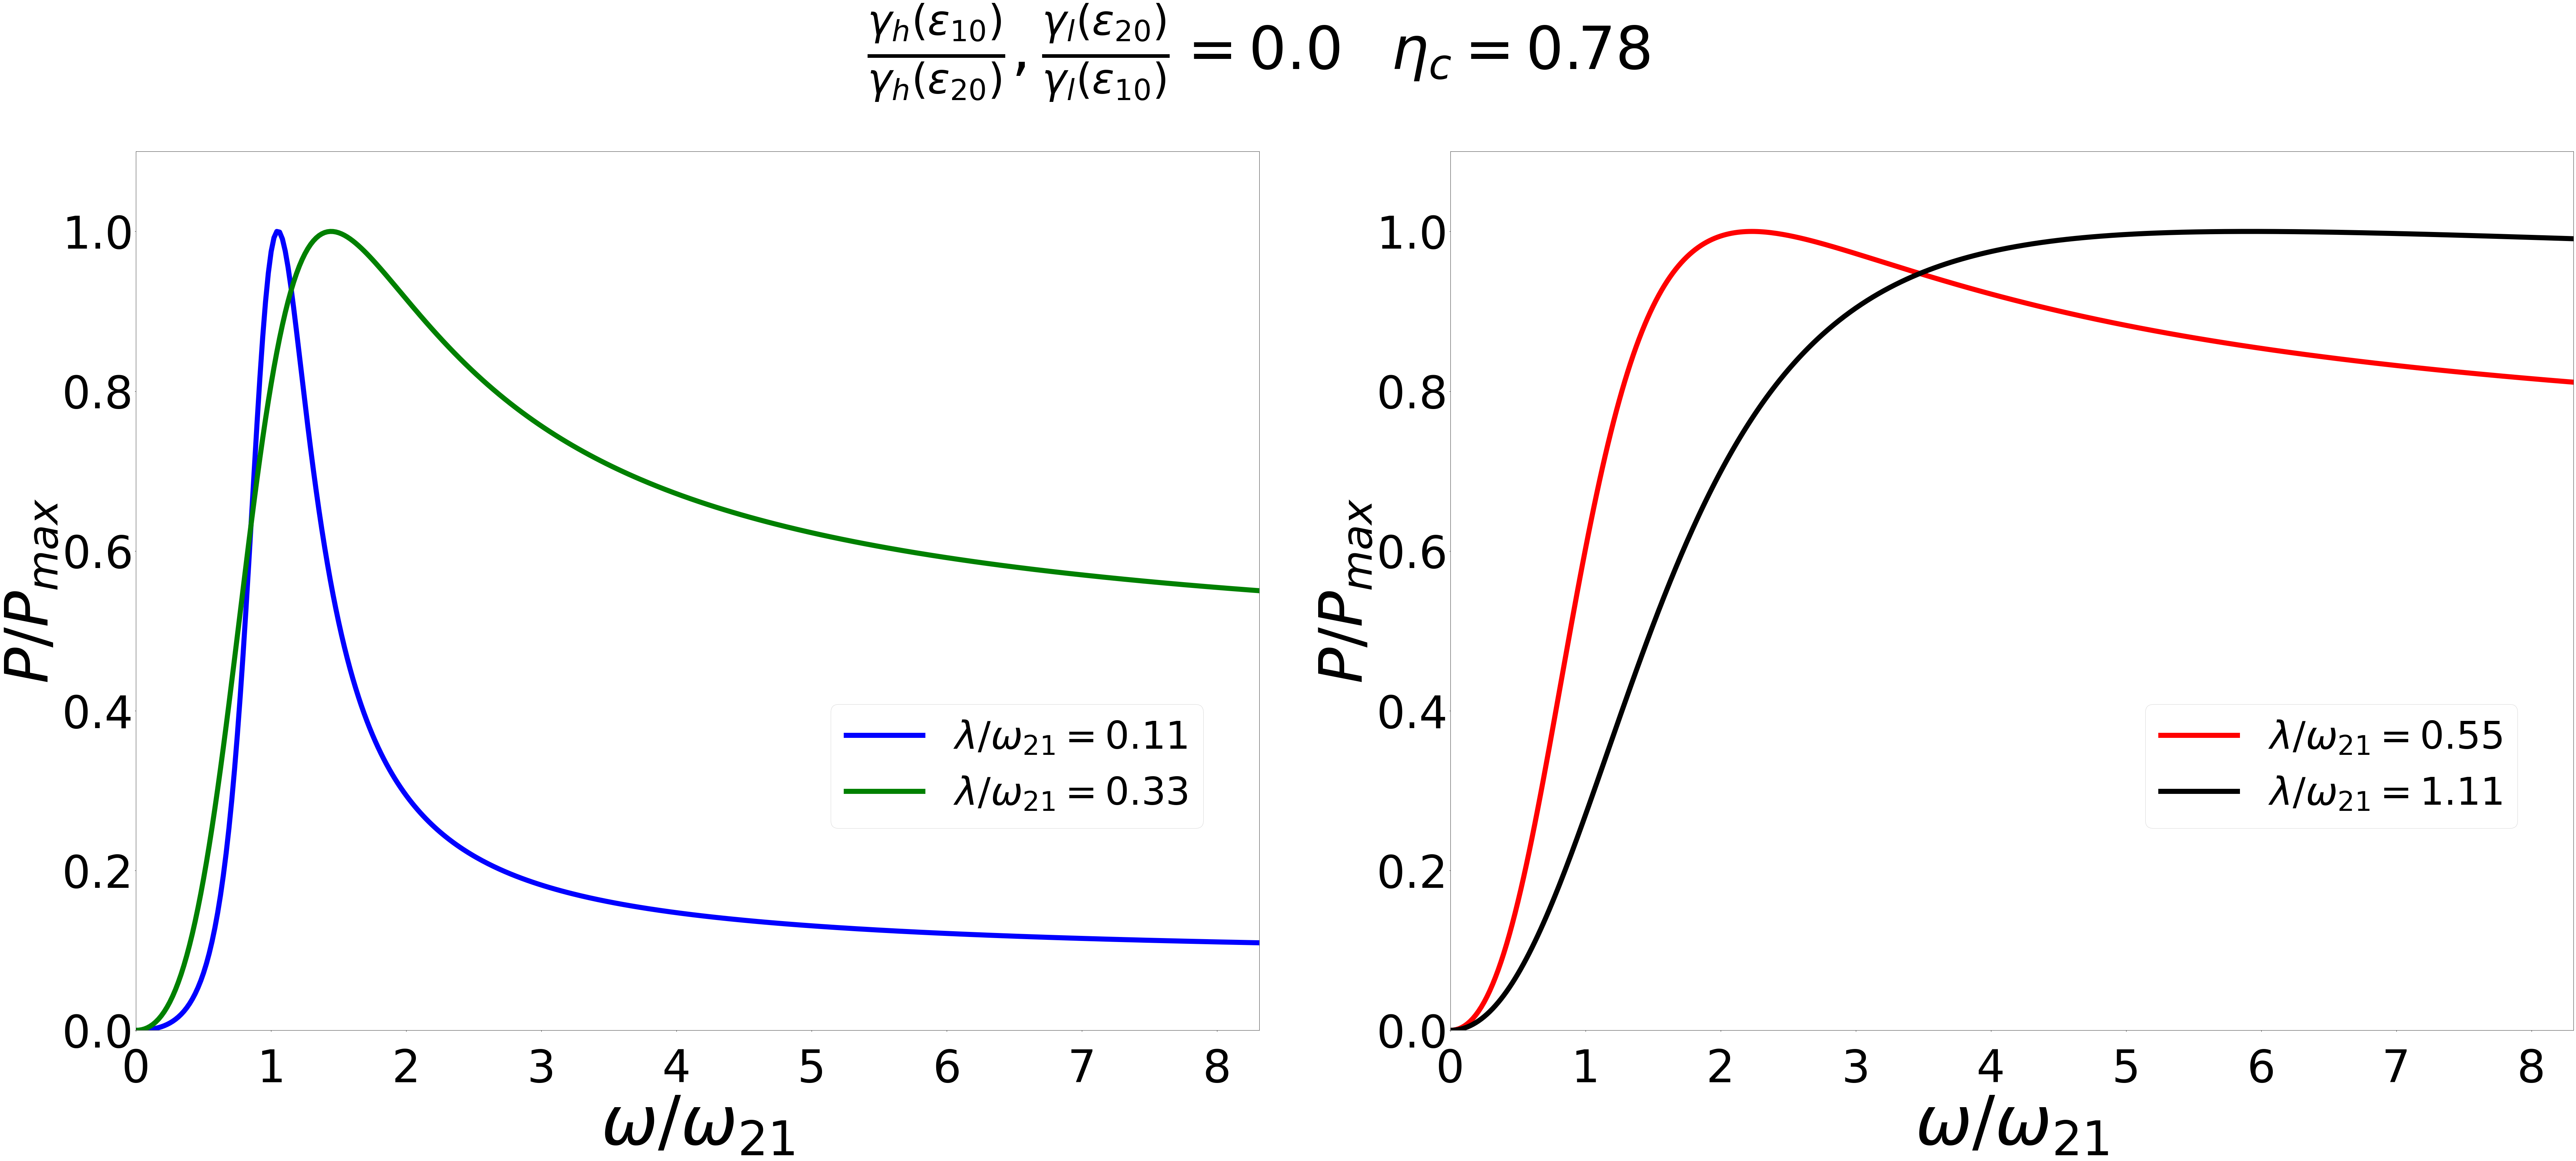

In [10]:
fig  = plt.figure(constrained_layout=True)
widths = [10,10]
heights = [ 5]
specs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths,
                          height_ratios=heights)

lwidth = 14
ax=[]
ax1 = fig.add_subplot(specs[0,0])
ax.append(ax1)
ax2 = fig.add_subplot(specs[0,1])
ax.append(ax2)

ax1.set_xlabel(r'$\omega/\omega_{21}}$',fontsize=188)
ax1.set_ylabel(r'$P/P_{max}$',fontsize =166)
line1, = ax1.plot([],[],color='blue',lw=lwidth)
line2, = ax1.plot([],[],color='green',lw=lwidth)


ax1.set_ylim(-0,1.1)



    
        
ax2.set_xlabel(r'$\omega/\omega_{21}}$',fontsize=188)
ax2.set_ylabel(r'$P/P_{max}$',fontsize =166)
line3, = ax2.plot([],[],color='red',lw=lwidth)
line4, = ax2.plot([],[],color='black',lw=lwidth)
#ax1.set_aspect('equal', 'datalim')

ax2.set_ylim(-0,1.1)

#ax2.set_title(r'$\eta_c=%.2f$'%(1-var.b_h[39]/var.b_l))


var = variables()    
var.g_h10 =  var.g_l10*0
var.g_l20 = var.g_h20*0   
P = POWER(var,39)
values =[1,3,5,10]    
x = var.omega/(var.w20-var.w10)
y = P
line1.set_data(x,y[values[0]]/max(y[values[0]]))
line1.set_label(r'$ \lambda/\omega_{21}=%.2f$'%(var.l[values[0]]/(var.w20-var.w10)) )
line2.set_data(x,y[values[1]]/max(y[values[1]]))
line2.set_label( r'$ \lambda/\omega_{21}=%.2f$'%(var.l[values[1]]/(var.w20-var.w10)) )
line3.set_data(x,y[values[2]]/max(y[values[2]]))
line3.set_label( r'$ \lambda/\omega_{21}=%.2f$'%(var.l[values[2]]/(var.w20-var.w10)) )
line4.set_data(x,y[values[3]]/max(y[values[3]]))
line4.set_label( r'$ \lambda/\omega_{21}=%.2f$'%(var.l[values[3]]/(var.w20-var.w10)) )
for i in ax:
    i.tick_params(axis='x', pad=45)
ax1.set_xlim(0,max(x))
ax2.set_xlim(0,max(x))
ax1.set_xticks(np.arange(9))
ax2.set_xticks(np.arange(9))
ax1.legend(bbox_to_anchor=(.95, .23), loc='lower right', borderaxespad=0, fontsize=106)
ax2.legend(bbox_to_anchor=(.95, .23), loc='lower right', borderaxespad=0, fontsize=106)
fig.tight_layout( rect=[0, 0, 4.6, 2.6])
fig.text( 1.6,2.8,r'$\frac{\gamma_h(\epsilon_{10})}{\gamma_h(\epsilon_{20})},\frac{\gamma_l(\epsilon_{20})}{\gamma_l(\epsilon_{10})}=%.1f$'\
             %(var.g_h10/var.g_l10)\
               + r'$ \;\;\; \eta_c=%.2f$'%(1-var.b_h[39]/var.b_l), fontsize= 164)  
plt.savefig(os.path.join(my_path1,'3level_omega_uniform2.eps'), bbox_inches='tight')

In [15]:
#save the data
values =[1,3,5,10]  
i =0
dict = {'omega/omega_21':list(x),'power_0.11':list(P[values[0]]),'power_0.33':list(P[values[1]])\
       ,'power_0.55':list(P[values[2]]),'power_1.11':list(P[values[3]])}
f = open(\
os.path.join(my_path,'coupling_'+'%.2f_'%(i/100)+'carnot_%.2f_'%(1-var.b_h[39]/var.b_l)+'omega'\
             +'.txt') ,'w')
f.write(str(dict))
f.close() 